# Original code from http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html           
# Added some comments and some joke                                                                     
    

In [1]:
                                                                                                 
import numpy as np                                                                                      
import pandas as pd                                                                                     
import scipy.stats as stats                                                                             
import matplotlib.pyplot as plt                                                                         
import math 

In [2]:
                                                                                              
# Population mean vs sample mean                                                                        
np.random.seed(6)                                                                                       
                                                                                                        
# The whole USA at some point in the XIX century                                                        
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)                                        
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)                                        
population_ages = np.concatenate((population_ages1, population_ages2))                                  
                                                                                                        
# A sample of voters from Duluth, Minnesota, at about the same time                                     
minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)                                             
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)                                             
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))                                     
                                                                                                        
                                                                                                        
print( population_ages.mean() )                                                                         
print( minnesota_ages.mean() )      

43.000112
39.26


The Student's t test is a test for the mean of two populations                                        
Null: the means are equals                                                                            
Alternative: the means differ                                                                         
                                                                                                        
Let's try to reject at 95% CL and 99% CL the null hypothesis that the sample comes from the same underlying pdf as the population                                                                            
                              

In [3]:
# One-sample test (dataset vs parameter)                                                                
stats.ttest_1samp(a= minnesota_ages,               # Sample data                                        
                 popmean= population_ages.mean())  # Pop mean                                           
                                                                                                        
# Fetch the test statistic value                                                                        
t_obs = XXXXXXXXXX                                                                                      
 

NameError: name 'XXXXXXXXXX' is not defined

Test statistic T: the value is to be compared with the quantile of the distribution of T that corresponds to our confidence level                                                                            
                                                                                                        
Question: why are the degrees of freedom 49? 

In [4]:
                                                                                    
stats.t.ppf(q=0.025,  # Quantile to check                                                               
            df=49)  # Degrees of freedom                                                                
                                                                                                        
stats.t.ppf(q=0.975,  # Quantile to check                                                               
            df=49)  # Degrees of freedom                                                                
                                                                                                        
    
                                                                                                        
                              
                                                                    

2.009575234489209

Exercise: find the quantile corresponding to 99%CL and check                                          
Do that also for 99% CL!                                                                              
                                                                                                        
p-value: probability of seeing a result as extreme as the observed one, under the null hypothesis 

In [5]:
stats.t.cdf(x= t_obs,      # T-test statistic                                                           
               df= 49) * 2 # Question: why times 2?                                                     
                                                                                                        
 

NameError: name 't_obs' is not defined

Question: Is this the same value as the one from stats.ttest_1samp?    

Is the p-value lower than our significance level α (equal to 1-conf.level or 0.05)?
Do we reject the null hypothesis?

Let's construct a 95% confidence interval for the sample

In [6]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate





(36.369669080722176, 42.15033091927782)

Does it contain the population mean?

What happens at 99% confidence level?


In [7]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate








(35.40547994092107, 43.11452005907893)

Now let's check two samples of voters in the lovely Oshkosh, Wisconsin

In [8]:

np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


We now want to test the null hypothesis that the two samples have the same mean

In [9]:
stats.ttest_ind(a= minnesota_ages, # sample
                b= wisconsin_ages, # other sample
                equal_var=False)    # Question: can we samples have equal variance? Should we? What happens if we do?

# Store the value of the test statistic
t2_obs = XXXXXX



NameError: name 'XXXXXX' is not defined

What's the p-value and its interpretation?

Do we reject the null at 95% CL?

And at 99% CL?

# Paired T-Test

Until now we have tested independent groups.

Let's now go to the hospital in Oshkosh in the 21st century, and check the effects of a weight-loss treatment on the same group of patients, before and after the treatment.



In [11]:

np.random.seed(11)
before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data





,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,249.115171,250.345546,-1.230375
std,28.422183,28.132539,4.783696
min,165.913930,170.400443,-11.495286
25%,229.148236,230.421042,-4.046211
50%,251.134089,250.830805,-1.413463
75%,268.927258,270.637145,1.738673
max,316.720357,314.700233,9.759282


What's the average weight change?

Let's see if this difference is significant at the 95% confidence level

In [12]:
stats.ttest_rel(a = before,
                b = after)



Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

What does the p-value tell us?

# Type I and Type II Error

A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence.

The evidence may lack the strength to arrive at the correct conclusion.

Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

Type I error: you reject the null hypothesis when it is actually true ("false positive") The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

Type II error: you fail to reject the null hypothesis when it is actually false ("false negative"). The higher your confidence level, the more likely you are to make a type II error.


Text(0,0.02,u'Type 2 Error')

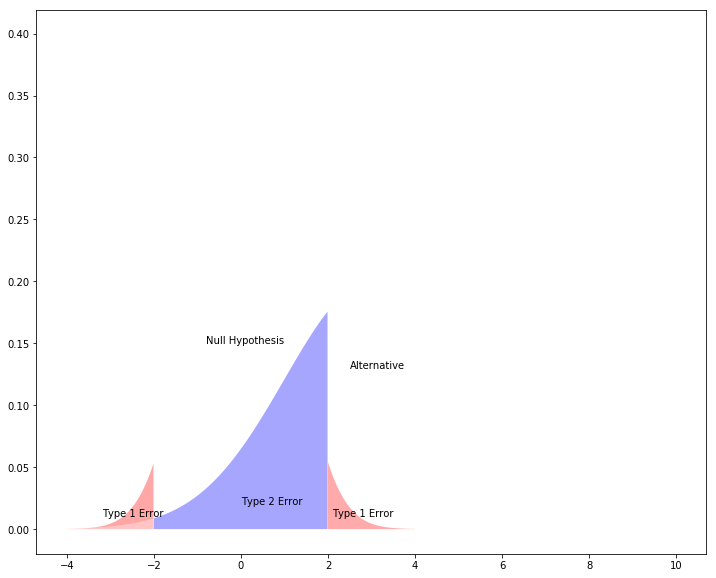

In [13]:

plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")




Now calculate the actual error rates

In [14]:

lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low


0.294956061112323